<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


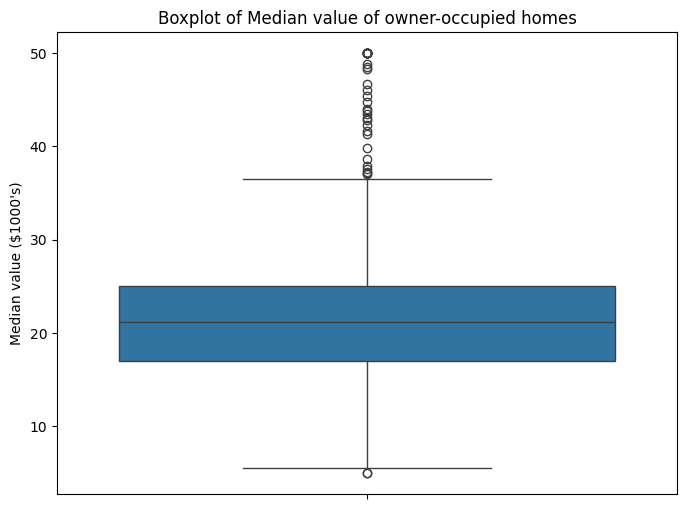

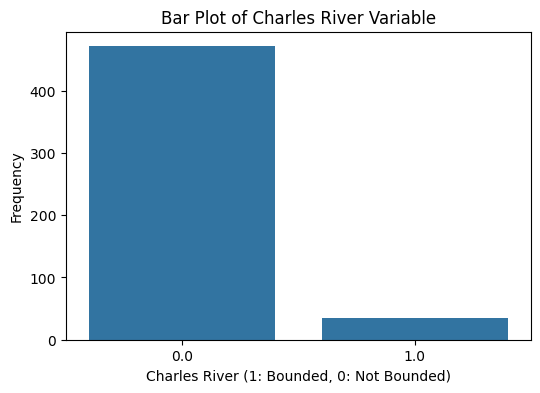

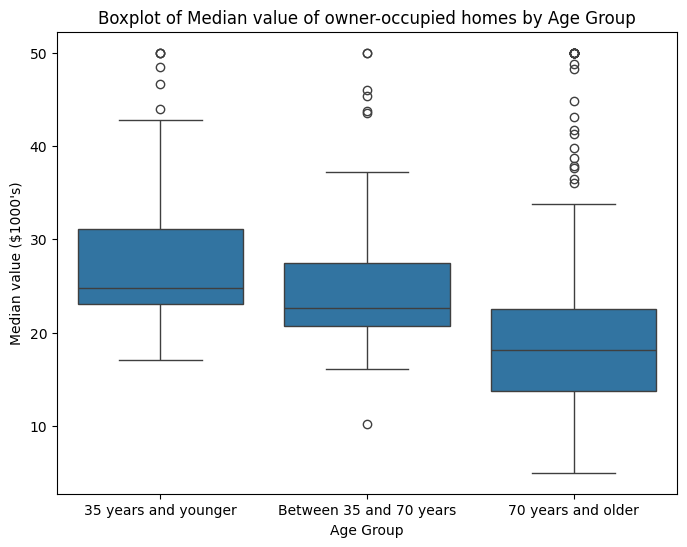

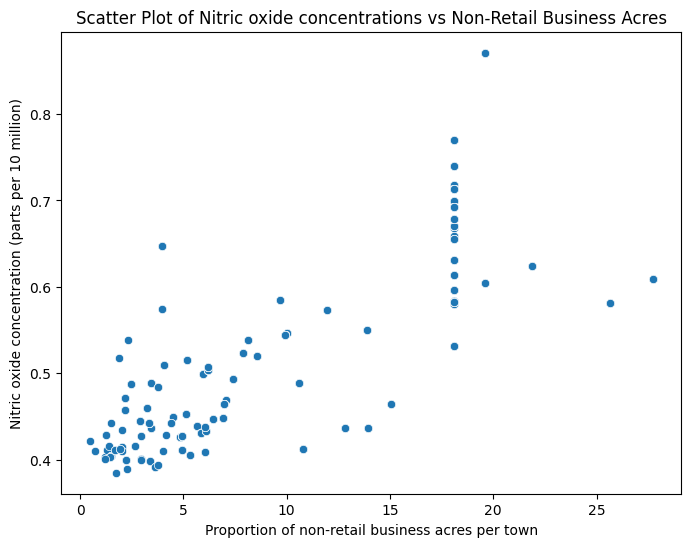

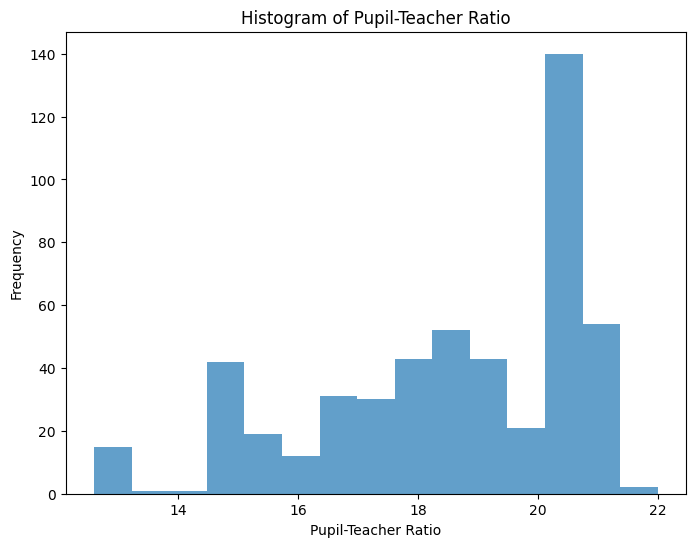


T-test Results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05

ANOVA Results:
                 sum_sq     df         F        PR(>F)
AGE_group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN

Pearson Correlation Results:
Correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98

Regression Analysis Results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        19:48:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:        

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import io
from js import fetch

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

async def fetch_data(url):
    resp = await fetch(url)
    return io.BytesIO((await resp.arrayBuffer()).to_py())

boston_url = await fetch_data(URL)
boston_df = pd.read_csv(boston_url)

plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median value of owner-occupied homes')
plt.ylabel('Median value ($1000\'s)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1: Bounded, 0: Not Bounded)')
plt.ylabel('Frequency')
plt.show()

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median value of owner-occupied homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median value ($1000\'s)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric oxide concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentration (parts per 10 million)')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, alpha=0.7)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

charles_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(charles_bounded, not_charles_bounded)
print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

model = ols('MEDV ~ AGE_group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Results:")
print(anova_table)

corr, p_value = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print("\nPearson Correlation Results:")
print("Correlation coefficient:", corr)
print("P-value:", p_value)

X = boston_df[['DIS']]
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Analysis Results:")
print(model.summary())